In [54]:
# some necessary imports

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()  # plot styling
from sklearn.linear_model import LinearRegression

https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/

,DAILY_DOWNLOADS,PACKAGE_NAME,TOTAL_DOWNLOADS,ACTIVE_INSTALLS,NUMBER_OF_COMMENTS,1_STAR_RATINGS,2_STAR_RATINGS,3_STAR_RATINGS,4_STAR_RATINGS,5_STAR_RATINGS,VERSION_CODE,NUM_ERRORS,TOTAL_REVENUE,CURRENCY
DATE,,,,,,,,,,,,,,
2015-01-08 20:00:00,0,com.oxbowsoft.debtplanner,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2015-01-09 20:00:00,5,com.oxbowsoft.debtplanner,0,0,0,0,0,0,0,1,0,0,NaN,NaN
2015-01-10 20:00:00,6,com.oxbowsoft.debtplanner,5,4,0,0,0,0,0,1,0,0,NaN,NaN
2015-01-11 20:00:00,14,com.oxbowsoft.debtplanner,11,8,2,0,0,0,0,3,0,0,NaN,NaN
2015-01-12 20:00:00,14,com.oxbowsoft.debtplanner,25,19,2,0,0,0,0,3,0,0,NaN,NaN
2015-01-13 20:00:00,19,com.oxbowsoft.debtplanner,39,28,2,0,0,0,0,3,0,0,NaN,NaN
2015-01-14 20:00:00,21,com.oxbowsoft.debtplanner,58,45,2,0,0,0,0,3,0,0,NaN,NaN
2015-01-15 20:00:00,30,com.oxbowsoft.debtplanner,79,61,2,0,0,0,0,3,0,0,NaN,NaN
2015-01-16 20:00:00,36,com.oxbowsoft.debtplanner,109,85,2,0,0,0,0,3,0,0,NaN,NaN


In [55]:
#THIS WAY ONLY WORKS FOR A SINGLE MISSING DAY

#zero_index = daily['DAILY_DOWNLOADS'].index[daily['DAILY_DOWNLOADS']==0]
#print zero_index
for zero_index in daily['DAILY_DOWNLOADS'].index[daily['DAILY_DOWNLOADS']==0]:
    zero_index_loc= daily.index.get_loc(zero_index)

    try:

        next_day_index = daily.iloc[zero_index_loc+1].name
        next_day_downloads = daily.iloc[zero_index_loc+1].DAILY_DOWNLOADS
        if next_day_downloads == 0:
            break
        print "zero index"
        print zero_index
        print "next day index"
        print next_day_index
        print "next_day_downloads " + str(next_day_downloads)
        #daily['DAILY_DOWNLOADS'][zero_index]=69
        #daily.xs(zero_index, copy = False)['DAILY_DOWNLOADS']=next_day_downloads/2
        #daily.xs(next_day_index, copy = False)['DAILY_DOWNLOADS']=next_day_downloads/2
        daily.ix[zero_index,'DAILY_DOWNLOADS'] = next_day_downloads/2
        daily.ix[next_day_index,'DAILY_DOWNLOADS'] = next_day_downloads/2
        
    except IndexError:        
        pass


In [69]:
#com.oxbowsoft.debtplanner.csv

daily = pd.read_csv('./com.oxbowsoft.debtplanner.csv', index_col='DATE', parse_dates=True)


# Load the data file, and create a column with total downloads
daily['DAILY_DOWNLOADS'] = daily['TOTAL_DOWNLOADS'].shift(-1) - daily['TOTAL_DOWNLOADS']
daily = daily[daily['DAILY_DOWNLOADS'].notnull()]
tempid = daily['DAILY_DOWNLOADS']
daily.drop(labels=['DAILY_DOWNLOADS'], axis=1,inplace = True)
daily.insert(0, 'DAILY_DOWNLOADS', tempid)
daily.head(10)

#zero_index = daily['DAILY_DOWNLOADS'].index[daily['DAILY_DOWNLOADS']==0]
#print zero_index
invalidate_next_day=0
for daily_index in daily['DAILY_DOWNLOADS'].index:

    index_loc= daily.index.get_loc(daily_index)
    this_day_downloads = daily.iloc[index_loc].DAILY_DOWNLOADS
    print str(daily_index) + "=>" + str(this_day_downloads)
        
    #TREAT THE VALUES AFTER THE ZERO VALUES AS UNKNOWN
    #if invalidate_next_day == 1:
    #    daily.ix[daily_index,'DAILY_DOWNLOADS'] = np.nan
    #    invalidate_next_day=0
    
    #TREAT THE ZERO VALUES AS UNKNOWN
    if this_day_downloads == 0:
        invalidate_next_day=1
        #daily.ix[daily_index,'DAILY_DOWNLOADS'] = np.nan
        daily.ix[daily_index,'DAILY_DOWNLOADS'] = 0
    else:
        invalidate_next_day=0
    print daily.iloc[index_loc].DAILY_DOWNLOADS

2015-01-08 20:00:00=>0.0
0.0
2015-01-09 20:00:00=>5.0
5.0
2015-01-10 20:00:00=>6.0
6.0
2015-01-11 20:00:00=>14.0
14.0
2015-01-12 20:00:00=>14.0
14.0
2015-01-13 20:00:00=>19.0
19.0
2015-01-14 20:00:00=>21.0
21.0
2015-01-15 20:00:00=>30.0
30.0
2015-01-16 20:00:00=>36.0
36.0
2015-01-17 20:00:00=>48.0
48.0
2015-01-18 20:00:00=>56.0
56.0
2015-01-19 20:00:00=>69.0
69.0
2015-01-20 20:00:00=>58.0
58.0
2015-01-21 20:00:00=>65.0
65.0
2015-01-22 20:00:00=>0.0
0.0
2015-01-23 20:00:00=>94.0
94.0
2015-01-24 20:00:00=>58.0
58.0
2015-01-25 20:00:00=>63.0
63.0
2015-01-26 20:00:00=>66.0
66.0
2015-01-27 20:00:00=>0.0
0.0
2015-01-28 20:00:00=>90.0
90.0
2015-01-29 20:00:00=>56.0
56.0
2015-01-30 20:00:00=>53.0
53.0
2015-01-31 20:00:00=>56.0
56.0
2015-02-01 20:00:00=>49.0
49.0
2015-02-02 20:00:00=>64.0
64.0
2015-02-03 20:00:00=>60.0
60.0
2015-02-04 20:00:00=>71.0
71.0
2015-02-05 20:00:00=>44.0
44.0
2015-02-06 20:00:00=>34.0
34.0
2015-02-07 20:00:00=>40.0
40.0
2015-02-08 20:00:00=>34.0
34.0
2015-02-09 20:00:0

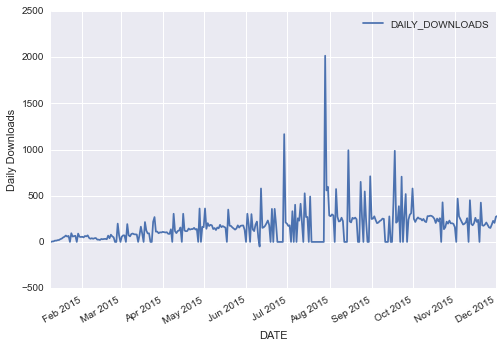

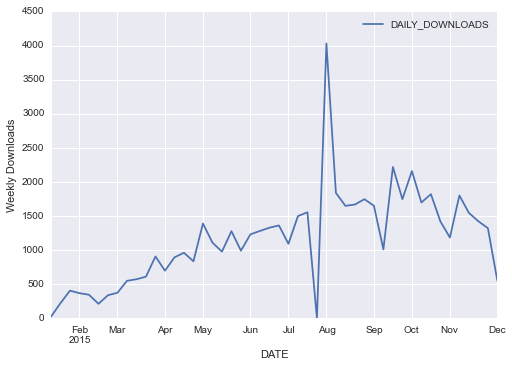

In [70]:
# Resample the data into daily and weekly totals

weekly = daily.resample('w', 'sum')

daily[['DAILY_DOWNLOADS']].plot()
plt.ylabel('Daily Downloads');

weekly[['DAILY_DOWNLOADS']].plot()
plt.ylabel('Weekly Downloads');

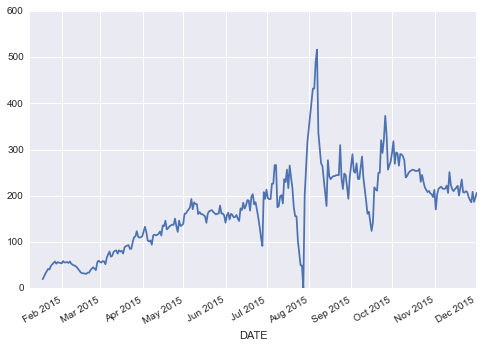

In [71]:
pd.stats.moments.rolling_mean(daily['DAILY_DOWNLOADS'], 10).plot();

In [72]:
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
daily['dayofweek'] = daily['DAILY_DOWNLOADS'].index.dayofweek
daily.head()

,DAILY_DOWNLOADS,PACKAGE_NAME,TOTAL_DOWNLOADS,ACTIVE_INSTALLS,NUMBER_OF_COMMENTS,1_STAR_RATINGS,2_STAR_RATINGS,3_STAR_RATINGS,4_STAR_RATINGS,5_STAR_RATINGS,VERSION_CODE,NUM_ERRORS,TOTAL_REVENUE,CURRENCY,dayofweek
DATE,,,,,,,,,,,,,,,
2015-01-08 20:00:00,0,com.oxbowsoft.debtplanner,0,0,0,0,0,0,0,0,0,0,NaN,NaN,3
2015-01-09 20:00:00,5,com.oxbowsoft.debtplanner,0,0,0,0,0,0,0,1,0,0,NaN,NaN,4
2015-01-10 20:00:00,6,com.oxbowsoft.debtplanner,5,4,0,0,0,0,0,1,0,0,NaN,NaN,5
2015-01-11 20:00:00,14,com.oxbowsoft.debtplanner,11,8,2,0,0,0,0,3,0,0,NaN,NaN,6
2015-01-12 20:00:00,14,com.oxbowsoft.debtplanner,25,19,2,0,0,0,0,3,0,0,NaN,NaN,0


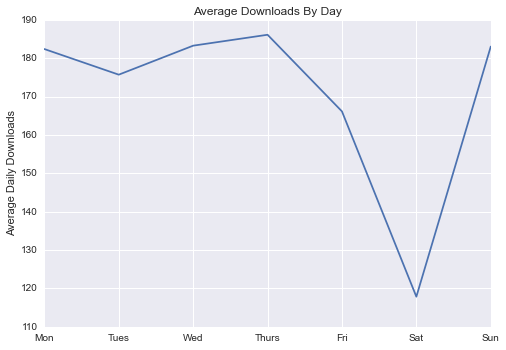

In [73]:
grouped = daily.groupby('dayofweek')['DAILY_DOWNLOADS'].mean()
grouped.index = days

grouped.plot()
plt.title("Average Downloads By Day")
plt.ylabel("Average Daily Downloads");

In [74]:
# Add one-hot indicators of weekday
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
daily.head()

,DAILY_DOWNLOADS,PACKAGE_NAME,TOTAL_DOWNLOADS,ACTIVE_INSTALLS,NUMBER_OF_COMMENTS,1_STAR_RATINGS,2_STAR_RATINGS,3_STAR_RATINGS,4_STAR_RATINGS,5_STAR_RATINGS,...,TOTAL_REVENUE,CURRENCY,dayofweek,Mon,Tues,Wed,Thurs,Fri,Sat,Sun
DATE,,,,,,,,,,,,,,,,,,,,,
2015-01-08 20:00:00,0,com.oxbowsoft.debtplanner,0,0,0,0,0,0,0,0,...,NaN,NaN,3,0,0,0,1,0,0,0
2015-01-09 20:00:00,5,com.oxbowsoft.debtplanner,0,0,0,0,0,0,0,1,...,NaN,NaN,4,0,0,0,0,1,0,0
2015-01-10 20:00:00,6,com.oxbowsoft.debtplanner,5,4,0,0,0,0,0,1,...,NaN,NaN,5,0,0,0,0,0,1,0
2015-01-11 20:00:00,14,com.oxbowsoft.debtplanner,11,8,2,0,0,0,0,3,...,NaN,NaN,6,0,0,0,0,0,0,1
2015-01-12 20:00:00,14,com.oxbowsoft.debtplanner,25,19,2,0,0,0,0,3,...,NaN,NaN,0,1,0,0,0,0,0,0


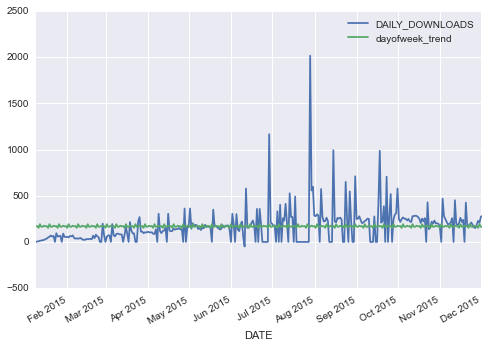

In [75]:
# de-trend on days of the week and daylight together
X = daily[days]
y = daily['DAILY_DOWNLOADS']
clf = LinearRegression().fit(X, y)

daily['dayofweek_trend'] = clf.predict(X)
daily[['DAILY_DOWNLOADS', 'dayofweek_trend']].plot();

rms = 190


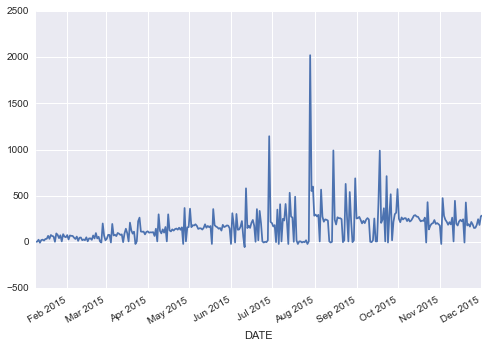

In [76]:
daily['dayofweek_corrected'] = (daily['DAILY_DOWNLOADS'] - daily['dayofweek_trend'] + daily['dayofweek_trend'].mean())
print("rms = {0:.0f}".format(np.std(daily['dayofweek_corrected'])))
daily['dayofweek_corrected'].plot();

In [81]:
import pymc3 as pm

data = dict(x=X.values, y=daily['DAILY_DOWNLOADS'].values)

with pm.Model() as download_model:
    
    # specify glm and pass in data. The resulting linear model, its likelihood and 
    # and all its parameters are automatically added to our model.
    
    pm.glm.glm('y ~ x', data)
    
    # Inference!
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = pm.sample(2000, step, progressbar=True) # draw 2000 posterior samples using NUTS sampling



 [-----------------100%-----------------] 2000 of 2000 complete in 1.6 sec

In [85]:
print y.head()

DATE
2015-01-08 20:00:00     0
2015-01-09 20:00:00     5
2015-01-10 20:00:00     6
2015-01-11 20:00:00    14
2015-01-12 20:00:00    14
Name: DAILY_DOWNLOADS, dtype: float64


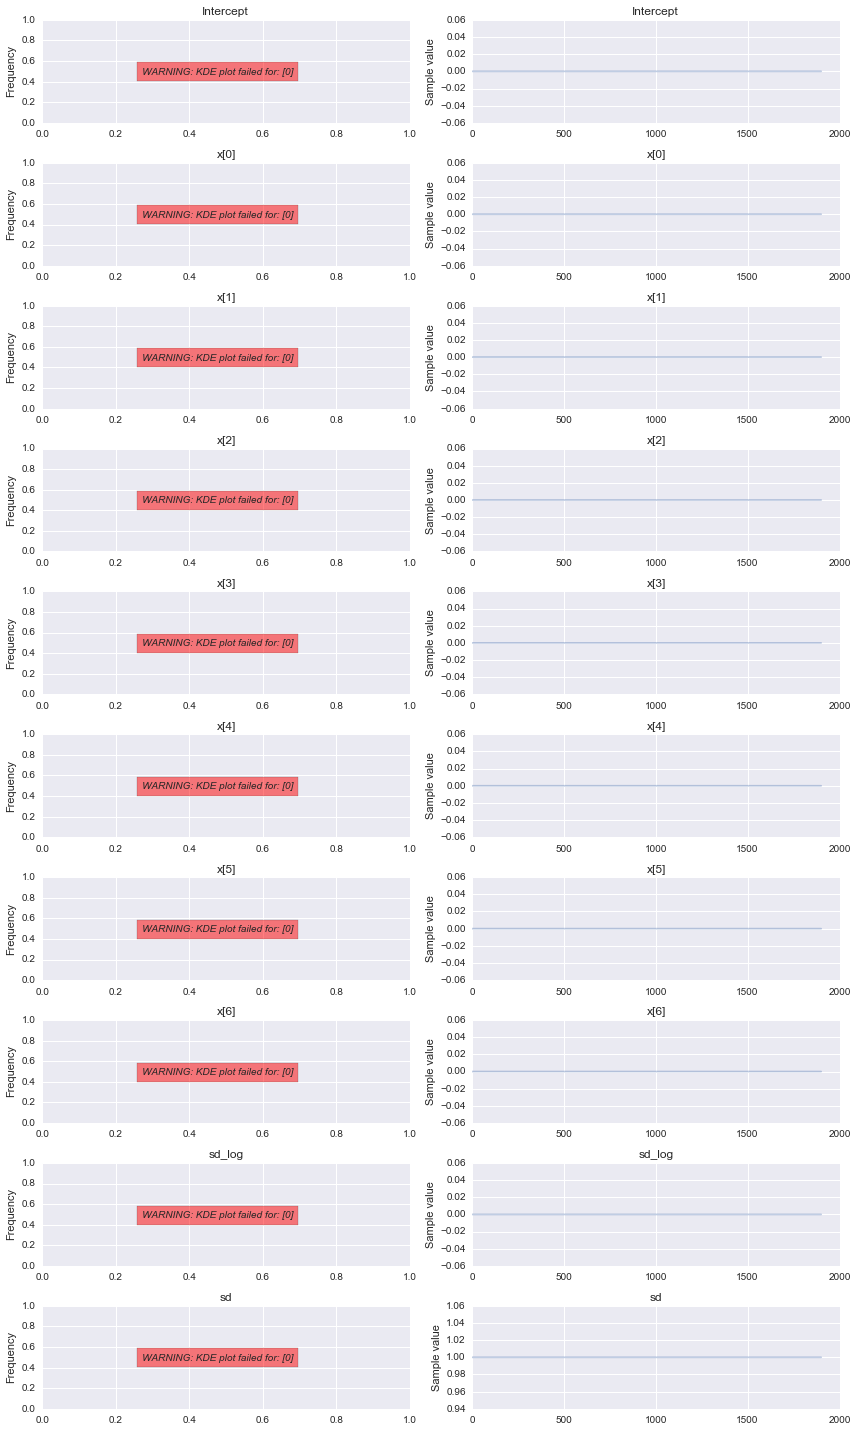

In [83]:

plt.figure(figsize=(7, 7))
pm.traceplot(trace[100:])
plt.tight_layout();